In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN, KMeansSMOTE
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from google.colab import drive
from gsmote import GeometricSMOTE

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U geometric-smote

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/predictive_maintenance.csv")
df["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [ ]:
new_df=df.drop(["Failure Type", "UDI", "Product ID"],axis=1)
new_df.corr()

#sns.heatmap(new_df)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


In [ ]:
new_df


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


Preprocessing using Label Encoding

In [ ]:

new_df['Type'] = new_df['Type'].map({'L':0, 'M':1, 'H':2})
new_df["Type"].value_counts()


0    6000
1    2997
2    1003
Name: Type, dtype: int64

In [ ]:
class_df= new_df[new_df.Target!=0]
class_df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
50,0,298.9,309.1,2861,4.6,143,1
69,0,298.9,309.0,1410,65.7,191,1
77,0,298.8,308.9,1455,41.3,208,1
160,0,298.4,308.2,1282,60.7,216,1
161,0,298.3,308.1,1412,52.3,218,1
...,...,...,...,...,...,...,...
9758,0,298.6,309.8,2271,16.2,218,1
9764,0,298.5,309.5,1294,66.7,12,1
9822,0,298.5,309.4,1360,60.9,187,1
9830,0,298.3,309.3,1337,56.1,206,1


Visualizing using PCA

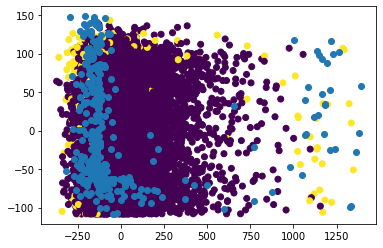

In [ ]:
pca=PCA(n_components=2)
pca_x=new_df.drop(["Target","Type"],axis=1)
pca_y= new_df["Target"]
plot_pca=pca.fit_transform(pca_x)
pca_df=pd.DataFrame(plot_pca)
plt.scatter(x=pca_df[0], y=pca_df[1],c=pca_y, alpha=1000)
plot_class=pca.fit_transform(class_df)
plot_class_df= pd.DataFrame(plot_class)
plt.scatter(x=plot_class_df[0], y=plot_class_df[1])




#new_df

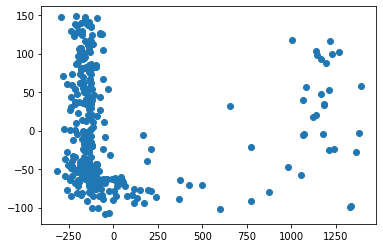

In [ ]:
plt.scatter(x=plot_class_df[0], y=plot_class_df[1])

Correlation Matrix

AxesSubplot(0.125,0.125;0.62x0.755)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Type,1.000000,-0.015176,-0.012101,-0.003979,-0.003097,-0.007255,-0.036715
Air temperature [K],-0.015176,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],-0.012101,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],-0.003979,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],-0.003097,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],-0.007255,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.036715,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


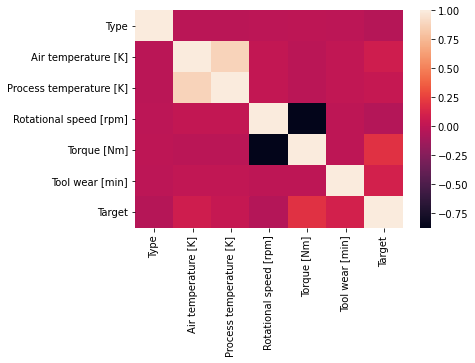

In [ ]:
print(sns.heatmap(new_df.corr()))
new_df.corr()

Probability Distribution Plots

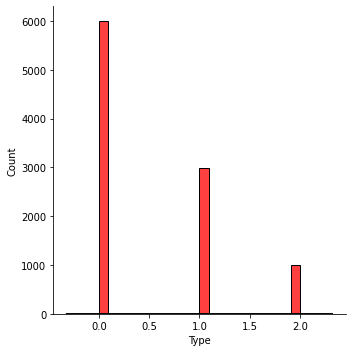

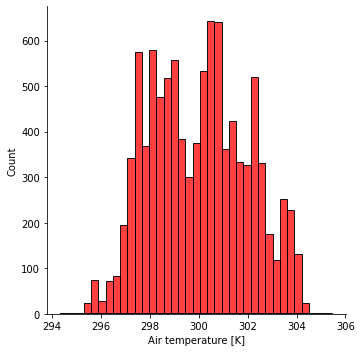

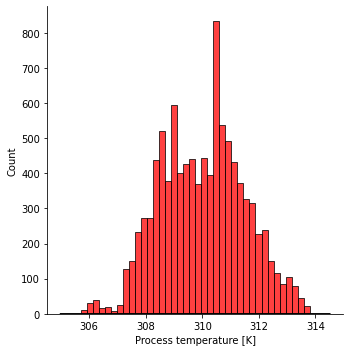

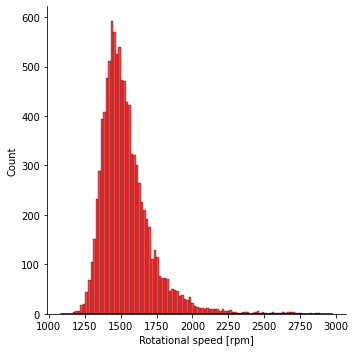

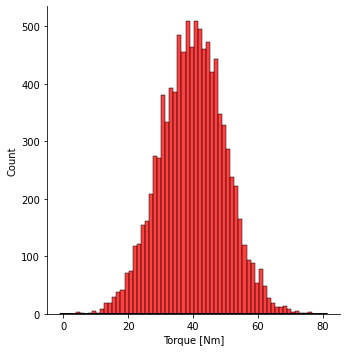

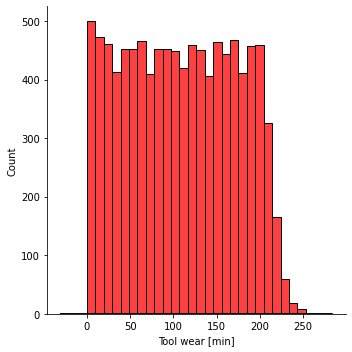

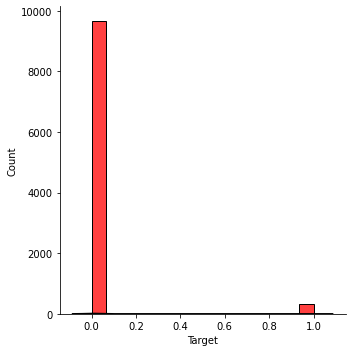

In [ ]:
from seaborn.widgets import plt
#
for i in new_df:
    
    sns.displot(new_df[i], label=i, color='red')
    sns.kdeplot(new_df[i], label=i,color='black')
    
    


Variance of features

In [ ]:
for i in new_df:
  variance= new_df[i].var()
  print(i,variance)

Type 0.4506449744974497
Air temperature [K] 4.001034798579856
Process temperature [K] 2.2014672331233114
Rotational speed [rpm] 32142.787047494745
Torque [Nm] 99.37963961586156
Tool wear [min] 4051.8503840384033
Target 0.032754065406540654


Class Distribution

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


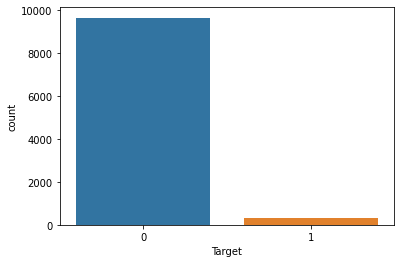

In [ ]:
sns.countplot(new_df["Target"])

Splitting the dataset into Test and Train Set

In [ ]:

train, test = train_test_split(new_df, test_size = 0.2, random_state = 60)
x_train= train.drop('Target',axis=1)
x_test= test.drop('Target',axis=1)
y_train= train['Target']
y_test= test['Target']
x_test

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
6088,0,300.9,310.8,1476,39.0,10
8695,1,297.2,308.6,1498,44.4,9
8158,0,299.6,310.8,1400,40.8,118
8301,1,298.7,310.1,1644,34.1,46
9947,1,298.2,307.9,1529,36.6,105
...,...,...,...,...,...,...
7247,1,300.0,310.1,1314,53.5,199
6353,1,300.0,309.6,1491,42.0,29
8143,0,299.7,310.9,1477,40.4,83
2360,2,299.2,308.4,1388,53.2,59


SVM model without SMOTE

In [ ]:
param_grid1 = {
     'kernel':['poly'],
    'C': [0.01, 0.1, 1,10],
    'degree':[1,2,3,4,5]
    }



svm_param1= GridSearchCV(SVC(), param_grid=param_grid1, cv=5, refit=True)
svm_param1.fit(x_train,y_train)
svm_param1.best_params_

KeyboardInterrupt: ignored

In [ ]:
svm_model1= SVC(C=10, degree=5, kernel= 'poly')
svm_model1.fit(x_train,y_train)
svm_train1= svm_model1.predict(x_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7733
           1       0.88      0.08      0.14       267

    accuracy                           0.97      8000
   macro avg       0.92      0.54      0.56      8000
weighted avg       0.97      0.97      0.96      8000

96.8875


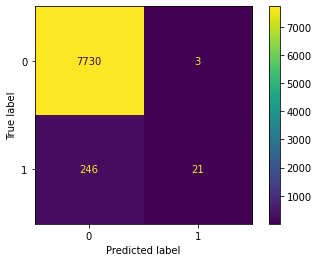

In [ ]:
#Training Accuracy
accuracy_train1 = accuracy_score(y_train,svm_train1)*100
plot_confusion_matrix(svm_model1,x_train, y_train)
print(classification_report(y_train,svm_train1))
print(accuracy_train1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


96.55
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1928
           1       0.80      0.06      0.10        72

    accuracy                           0.97      2000
   macro avg       0.88      0.53      0.54      2000
weighted avg       0.96      0.97      0.95      2000



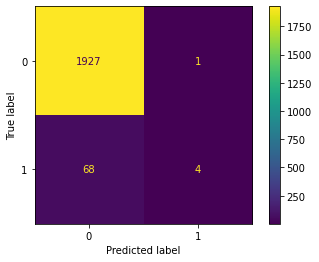

In [ ]:
#testing accuracy
svm_predict1= svm_model1.predict(x_test)
accuracy_test1 = accuracy_score(y_test,svm_predict1)*100
plot_confusion_matrix(svm_model1,x_test, y_test)
print(accuracy_test1)
print(classification_report(y_test, svm_predict1))

Naive Bayes

In [ ]:
nb= GaussianNB()
nb.fit(x_train,y_train)
nb_train= nb.predict(x_train)
nb_test= nb.predict(x_test)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7733
           1       0.34      0.21      0.26       267

    accuracy                           0.96      8000
   macro avg       0.66      0.60      0.62      8000
weighted avg       0.95      0.96      0.96      8000

95.9875


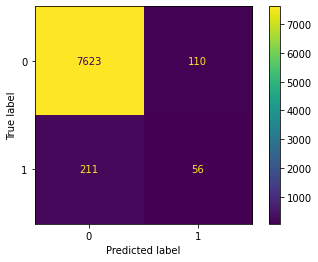

In [ ]:
#Training Accuracy
accuracy_train_nb = accuracy_score(y_train,nb_train)*100
plot_confusion_matrix(nb,x_train, y_train)
print(classification_report(y_train,nb_train))
print(accuracy_train_nb)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1928
           1       0.38      0.18      0.25        72

    accuracy                           0.96      2000
   macro avg       0.68      0.58      0.61      2000
weighted avg       0.95      0.96      0.95      2000

95.9875


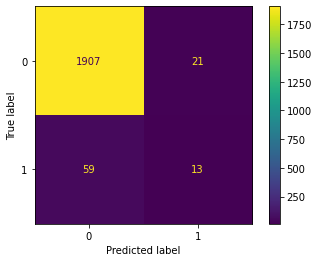

In [ ]:
#Testing
accuracy_test_nb = accuracy_score(y_test,nb_test)*100
plot_confusion_matrix(nb,x_test, y_test)
print(classification_report(y_test,nb_test))
print(accuracy_train_nb)

KNN

Geometric SMOTE

In [ ]:
gsm= GeometricSMOTE(k_neighbors=2, selection_strategy='combined', random_state=42)
geosampled_x, geosampled_y= gsm.fit_resample(x_train,y_train)

<function matplotlib.figure.figaspect(arg)>

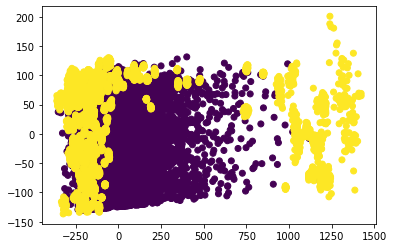

In [ ]:
pca_geo=PCA(n_components=2)

pca_geo_fit=pca_geo.fit_transform(geosampled_x)
pca_geodf=pd.DataFrame(pca_geo_fit)
plt.scatter(x=pca_geodf[0], y=pca_geodf[1],c= geosampled_y, alpha=100)
plt.figaspect

SVM on Geometric SMOTE


In [ ]:
param_grid3 = {
     'kernel':['poly'],
    'C': [0.01, 0.1, 1,10],
    'degree':[1,2,3,4,5]
    }



svm_param3= GridSearchCV(SVC(), param_grid=param_grid3, cv=5, refit=True)
svm_param3.fit(geosampled_x,geosampled_y)
svm_param3.best_params_

{'C': 10, 'degree': 5, 'kernel': 'poly'}

In [ ]:
svm_model3= SVC(C= 10, gamma= 'auto', kernel='rbf')
svm_model3.fit(geosampled_x,geosampled_y)
svm_train3= svm_model1.predict(geosampled_x)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.52      1.00      0.68      7733
           1       0.99      0.07      0.13      7733

    accuracy                           0.53     15466
   macro avg       0.76      0.53      0.40     15466
weighted avg       0.76      0.53      0.40     15466

53.34281650071123


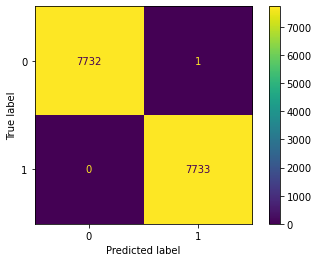

In [ ]:
#Training Accuracy
accuracy_train3 = accuracy_score(geosampled_y,svm_train3)*100
plot_confusion_matrix(svm_model3,geosampled_x, geosampled_y)
print(classification_report(geosampled_y,svm_train3))
print(accuracy_train3)

BorderLine SMOTE to balance class distribution

In [ ]:


sm = BorderlineSMOTE(sampling_strategy='minority', random_state=42,k_neighbors=5)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(x_train, y_train)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

<function matplotlib.figure.figaspect(arg)>

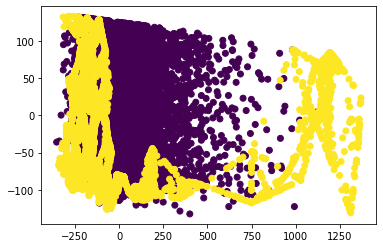

In [ ]:
pca_border=PCA(n_components=2)

pca_smote=pca_border.fit_transform(oversampled_X)
pca_smote_df=pd.DataFrame(pca_smote)
plt.scatter(x=pca_smote_df[0], y=pca_smote_df[1],c=oversampled_Y, alpha=100)
plt.figaspect

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


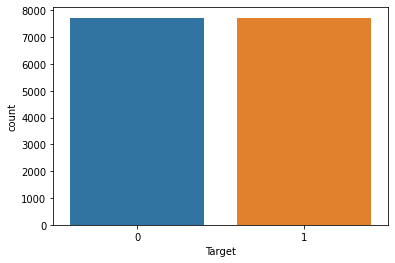

In [ ]:
sns.countplot(oversampled_Y)


Model Implementation SVM

In [ ]:
'''param_grid = {
     'kernel':['rbf'],
    'C': [0.01, 0.1, 1,10],
    'gamma':['auto','scale']
    }'''
#{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
param_grid = {
     'kernel':['poly'],
    'C': [0.01, 0.1, 1,10],
    'degree':[1,2,3,4,5]
    }



svm_param= GridSearchCV(SVC(), param_grid=param_grid, cv=5, refit=True)
svm_param.fit(oversampled_X,oversampled_Y)
svm_param.best_params_

KeyboardInterrupt: ignored

In [ ]:
svm_model= SVC(C=10, degree=5, kernel= 'poly')
svm_model.fit(oversampled_X,oversampled_Y)
svm_train= svm_model.predict(oversampled_X)


In [ ]:
svm_predict= svm_model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.85      0.88      7733
           1       0.86      0.91      0.88      7733

    accuracy                           0.88     15466
   macro avg       0.88      0.88      0.88     15466
weighted avg       0.88      0.88      0.88     15466

87.99948273632484


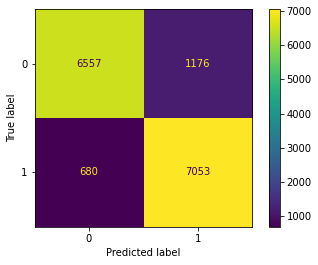

In [ ]:
#Training Accuracy
accuracy_train = accuracy_score(oversampled_Y,svm_train)*100
plot_confusion_matrix(svm_model,oversampled_X, oversampled_Y)
print(classification_report(oversampled_Y,svm_train))
print(accuracy_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


85.95
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1928
           1       0.19      0.88      0.31        72

    accuracy                           0.86      2000
   macro avg       0.59      0.87      0.62      2000
weighted avg       0.97      0.86      0.90      2000



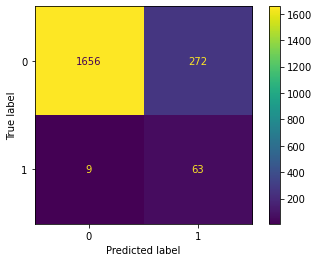

In [ ]:
#testing accuracy
accuracy_test = accuracy_score(y_test,svm_predict)*100
plot_confusion_matrix(svm_model,x_test, y_test)
print(accuracy_test)
print(classification_report(y_test, svm_predict))